In [1]:
#TODO
#polish tables and outputs
#complete agg summary  to single line instead of col?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [3]:
def clean_headers(df):
    df.columns = df.columns.str.replace(" ", "_")
    return df

In [4]:
#import csvs as dfs
metadata_df = pd.read_csv('data/Mouse_metadata.csv')
results_df = pd.read_csv('data/Study_results.csv')

clean_headers(metadata_df)
clean_headers(results_df)

,Mouse_ID,Timepoint,Tumour_Volume_(mm3),Metastatic_Sites
0,b128,0,45.000000,0
1,f932,0,45.000000,0
2,g107,0,45.000000,0
3,a457,0,45.000000,0
4,c819,0,45.000000,0
...,...,...,...,...
1888,r944,45,41.581521,2
1889,u364,45,31.023923,3
1890,p438,45,61.433892,1
1891,x773,45,58.634971,4


In [5]:
#merge csvs
results_merged = pd.merge(metadata_df, results_df, how = 'outer', on = 'Mouse_ID')
print('Merged results:')
results_merged

Merged results:


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumour_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
#display number of unique mice IDs
unique_id_count = results_merged['Mouse_ID'].nunique()
print(f"There are {unique_id_count} unique Mouse ID's")

There are 249 unique Mouse ID's


In [7]:
#check for mouse ID with duplicate time points.
#display data associated with mouseID
filt = results_merged.duplicated(subset = ['Mouse_ID', 'Timepoint'], keep = False)

duplicate_data = results_merged[filt]
num_duplicates = duplicate_data['Mouse_ID'].nunique()

if num_duplicates == 1:
    print(f'There was 1 unique ID detected with duplicated timepoints.')
elif num_duplicates <1:
    print(f"There were {num_duplicates} unique ID's detected with duplicated timepoints.")
else:
    print("There were no ID's detected with duplicated timepoints.")
print('Duplicated data:')
duplicate_data

There was 1 unique ID detected with duplicated timepoints.
Duplicated data:


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumour_Volume_(mm3),Metastatic_Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
#create new resultes_cleaned where the data is removed and use cleaned resultes_cleaned for remaining steps.
results_cleaned = results_merged.query('Mouse_ID != "g989"')


In [9]:
#display the updated number of unique ids for the cleaned data.
unique_id_count = results_cleaned['Mouse_ID'].nunique()
print(f"There are now {unique_id_count} unique Mouse ID's")

There are now 248 unique Mouse ID's


In [10]:
#create new df for summary statistics
drug_group = results_cleaned.groupby(by = 'Drug_Regimen')
summary_stats = pd.DataFrame(
    columns=[
        'Mean', 
        'Median', 
        'Variance', 
        'Stdev', 
        'SEM'
        ])

for col, drug in drug_group:
    mean = drug['Tumour_Volume_(mm3)'].mean()
    median = drug['Tumour_Volume_(mm3)'].median()
    variance = drug['Tumour_Volume_(mm3)'].var()
    std = drug['Tumour_Volume_(mm3)'].std()
    sem = drug['Tumour_Volume_(mm3)'].sem()
    
    summary_stats.loc[col] = [mean, median, variance, std, sem]
    
print('Tumor volume statistics by drug:')
summary_stats.round(2)

Tumor volume statistics by drug:


,Mean,Median,Variance,Stdev,SEM
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57
Zoniferol,53.24,51.82,48.53,6.97,0.52


In [11]:
# Using the aggregation method, produce the same summary statistics in a single line
agg_summary = pd.DataFrame(summary_stats.agg
    ({
    'Mean':'mean', 
    'Median':'median', 
    'Variance':'var', 
    'Stdev':'std', 
    'SEM':'sem'
    }))

print("Aggregated summary of statistics for all drugs")
agg_summary

Aggregated summary of statistics for all drugs


,0
Mean,50.975982
Median,51.819532
Variance,256.269612
Stdev,1.216096
SEM,0.032721


In [12]:
results_cleaned

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumour_Volume_(mm3),Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
#bar and pie chart section --------------------------------------------------------------------------
#Prepare data for charts
time_points_drug = results_cleaned.groupby("Drug_Regimen")["Timepoint"].count()
time_points_drug


Drug_Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

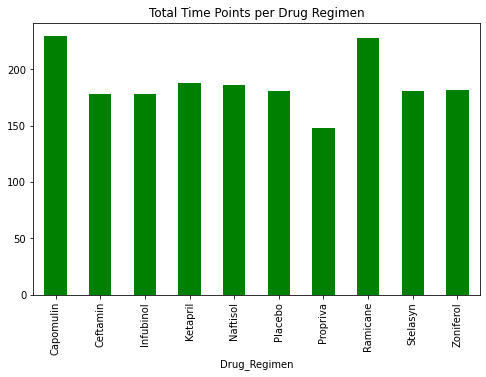

In [14]:
#bar chart 1: total number of time points for all mice tested for each drug throughout the study
#create using DataFrame.plot()
fig_size = (8, 5)
time_points_drug.plot(kind = "bar", 
                             title = "Total Time Points per Drug Regimen", 
                             figsize = fig_size,
                             color = 'green'
                             )

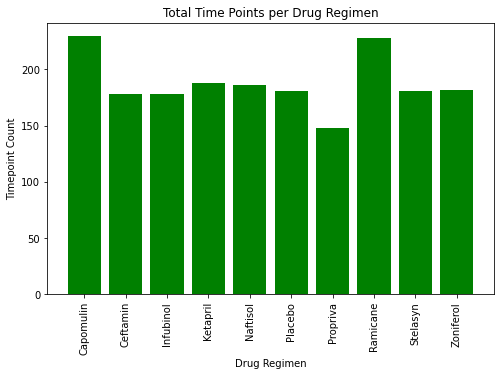

In [15]:
#bar chart 2: Create bar chart with matplotlib.pyplot
fig, chart_2 = plt.subplots(figsize = fig_size)

chart_2.bar(time_points_drug.index, time_points_drug.values, color = 'green')

chart_2.set_title("Total Time Points per Drug Regimen")

chart_2.set_xlabel("Drug Regimen")
plt.xticks(rotation = 90)

chart_2.set_ylabel("Timepoint Count")

plt.show()

In [16]:
sex_timepoint_grp = pd.DataFrame(results_cleaned.groupby(['Sex']).count().loc[:,'Timepoint'])
sex_timepoint_grp

,Timepoint
Sex,
Female,922
Male,958


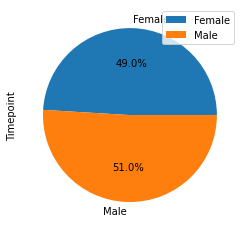

In [17]:
sex_timepoint_grp.plot.pie(y = 'Timepoint', labels = sex_timepoint_grp.index, autopct = '%1.1f%%')

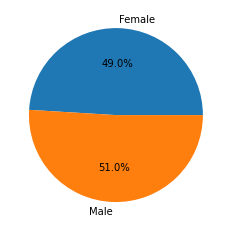

In [18]:
plt.pie(sex_timepoint_grp['Timepoint'], labels = sex_timepoint_grp.index, autopct='%1.1f%%')
plt.show()

In [19]:
#Calculate Quartiles, Find Outliers, and Create a Box Plot----------------------------------------------

mouseID_timepoint_max = results_cleaned.groupby(["Mouse_ID", "Drug_Regimen"]).tail(1)
print("Data containing the final timepoint for each unique Mouse_ID")
mouseID_timepoint_max


Data containing the final timepoint for each unique Mouse_ID


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumour_Volume_(mm3),Metastatic_Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0
1862,z435,Propriva,Female,12,26,10,48.710661,0
1872,z581,Infubinol,Female,24,25,45,62.754451,3
1882,z795,Naftisol,Female,13,29,45,65.741070,3


In [20]:
treatments = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
boxplot_groups = mouseID_timepoint_max[mouseID_timepoint_max['Drug_Regimen'].isin(treatments)]
boxplot_groups 


,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_(g),Timepoint,Tumour_Volume_(mm3),Metastatic_Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1
...,...,...,...,...,...,...,...,...
1797,x822,Ceftamin,Male,3,29,45,61.386660,3
1813,y163,Infubinol,Female,17,27,45,67.685569,3
1845,y769,Ceftamin,Female,6,27,45,68.594745,4
1855,y865,Ceftamin,Male,23,26,45,64.729837,3


In [85]:
#Create a list that holds the treatment names as well as a second, empty list to hold the tumour volume data.
treatments = ['Ramicane', 'Capomulin', 'Infubinol', 'Ceftamin']
tumor_vol = []
outliers = []

for treatment in treatments:
    regimen = boxplot_groups[boxplot_groups['Drug_Regimen'] == treatment]['Tumour_Volume_(mm3)']
    tumor_vol.append(regimen.tolist())

# Determine outliers using upper and lower bounds
    quartiles = regimen.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outlier = regimen[(regimen < lower_bound) | (regimen > upper_bound)].tolist()
    outliers.append(outlier)


In [102]:
outliers_df = pd.DataFrame(outliers)
outliers_df.columns = ['Tumor_Volume_(mm3)']
outliers_df = outliers_df.applymap(lambda x: np.nan if x==[] else x)
outliers_df.index = treatments

print("List of Outliers Identified")
outliers_df.round(2)

List of Outliers Identified


,Tumor_Volume_(mm3)
Ramicane,NaN
Capomulin,NaN
Infubinol,36.32
Ceftamin,NaN


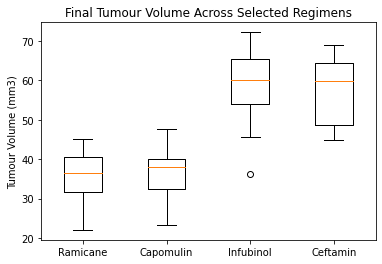

In [56]:
#generate a box plot that shows the distribution of the final tumour volume for all the mice in each treatment group. 
#Highlight any potential outliers in the plot by changing their color and style.
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumour Volume Across Selected Regimens')
ax1.set_ylabel('Tumour Volume (mm3)')
ax1.boxplot(tumor_vol, labels = treatments)
plt.show()


In [ ]:
#Create line and scatter plot----------------------------------------------------------------------------------------
#get data in correct format

In [ ]:
#Select a mouse that was treated with Capomulin, and generate a line plot of tumour volume versus time point for that mouse.


In [ ]:
#Generate a scatter plot of tumour volume versus mouse weight for the Capomulin treatment regimen.

In [ ]:
#Calculate the correlation coefficient and linear regression model between mouse weight and average tumour volume for the Capomulin treatment.

In [ ]:
#Plot the linear regression model on top of the previous scatter plot.